# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    units="metric"
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url+city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp (C)": city_max_temp,
                          "Humidity (%)": city_humidity,
                          "Cloudiness (%)": city_clouds,
                          "Wind Speed (m/s)": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sesheke
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | malanje
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | sinabang
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | rivera
Processing Record 13 of Set 1 | diu
Processing Record 14 of Set 1 | stanley
Processing Record 15 of Set 1 | settat
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | severobaykal'sk
Processing Record 18 of Set 1 | abou el hassan
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | ijuw
City not found. Skipping...
Processing Record 21 of Set 1 | badger
Processing 

Processing Record 40 of Set 4 | tamanrasset
Processing Record 41 of Set 4 | kavaratti
Processing Record 42 of Set 4 | kiskunfelegyhaza
Processing Record 43 of Set 4 | gobabis
Processing Record 44 of Set 4 | calarasi
Processing Record 45 of Set 4 | buritama
Processing Record 46 of Set 4 | lamu
Processing Record 47 of Set 4 | sitka
Processing Record 48 of Set 4 | nabire
Processing Record 49 of Set 4 | coruripe
Processing Record 50 of Set 4 | mariehamn
Processing Record 1 of Set 5 | leava
Processing Record 2 of Set 5 | nova sintra
Processing Record 3 of Set 5 | tabas
Processing Record 4 of Set 5 | lhokseumawe
Processing Record 5 of Set 5 | yanam
Processing Record 6 of Set 5 | archangelos
Processing Record 7 of Set 5 | hoxtolgay
City not found. Skipping...
Processing Record 8 of Set 5 | horsham
Processing Record 9 of Set 5 | crane
Processing Record 10 of Set 5 | nikologory
Processing Record 11 of Set 5 | uyar
Processing Record 12 of Set 5 | khilok
Processing Record 13 of Set 5 | meadow lak

Processing Record 33 of Set 8 | sittwe
Processing Record 34 of Set 8 | jinka
Processing Record 35 of Set 8 | tuzha
Processing Record 36 of Set 8 | puerto san jose
Processing Record 37 of Set 8 | taksimo
Processing Record 38 of Set 8 | hangu
Processing Record 39 of Set 8 | laguna
Processing Record 40 of Set 8 | potchefstroom
Processing Record 41 of Set 8 | weligama
Processing Record 42 of Set 8 | la ronge
Processing Record 43 of Set 8 | amga
Processing Record 44 of Set 8 | moron
Processing Record 45 of Set 8 | trairi
Processing Record 46 of Set 8 | penzance
Processing Record 47 of Set 8 | iranshahr
Processing Record 48 of Set 8 | port hedland
Processing Record 49 of Set 8 | el porvenir
Processing Record 50 of Set 8 | hermiston
Processing Record 1 of Set 9 | suntar
Processing Record 2 of Set 9 | gamawa
Processing Record 3 of Set 9 | lensk
Processing Record 4 of Set 9 | oranjestad
Processing Record 5 of Set 9 | betio village
Processing Record 6 of Set 9 | hamilton
Processing Record 7 of S

Processing Record 22 of Set 12 | murghob
Processing Record 23 of Set 12 | patacamaya
Processing Record 24 of Set 12 | altamira
Processing Record 25 of Set 12 | chernyshevskiy
Processing Record 26 of Set 12 | atar
Processing Record 27 of Set 12 | massawa
Processing Record 28 of Set 12 | conde
Processing Record 29 of Set 12 | onojo
Processing Record 30 of Set 12 | lathen
Processing Record 31 of Set 12 | tougan
Processing Record 32 of Set 12 | kharhial
Processing Record 33 of Set 12 | dunedin
Processing Record 34 of Set 12 | puerto madero
Processing Record 35 of Set 12 | fort bragg
Processing Record 36 of Set 12 | levuka
Processing Record 37 of Set 12 | sena madureira
Processing Record 38 of Set 12 | copala
Processing Record 39 of Set 12 | nishinoomote
Processing Record 40 of Set 12 | villa tupac amaru
Processing Record 41 of Set 12 | pinarbasi
Processing Record 42 of Set 12 | happy valley-goose bay
Processing Record 43 of Set 12 | qom
Processing Record 44 of Set 12 | plastun
Processing R

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City                575
Lat                 575
Lng                 575
Max Temp (C)        575
Humidity (%)        575
Cloudiness (%)      575
Wind Speed (m/s)    575
Country             575
Date                575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
0,sesheke,-17.4759,24.2968,24.63,50,29,2.42,ZM,1702321373
1,edinburgh of the seven seas,-37.0676,-12.3116,13.82,83,100,9.76,SH,1702321375
2,malanje,-9.5402,16.3410,17.54,97,100,0.56,AO,1702321377
3,adamstown,-25.0660,-130.1015,21.45,61,2,2.39,PN,1702321377
4,tiksi,71.6872,128.8694,-22.44,100,100,4.08,RU,1702321377


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,sesheke,-17.4759,24.2968,24.63,50,29,2.42,ZM,1702321373
1,edinburgh of the seven seas,-37.0676,-12.3116,13.82,83,100,9.76,SH,1702321375
2,malanje,-9.5402,16.3410,17.54,97,100,0.56,AO,1702321377
3,adamstown,-25.0660,-130.1015,21.45,61,2,2.39,PN,1702321377
4,tiksi,71.6872,128.8694,-22.44,100,100,4.08,RU,1702321377


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
today = time.strftime("%Y/%m/%d")
today

'2023/12/11'

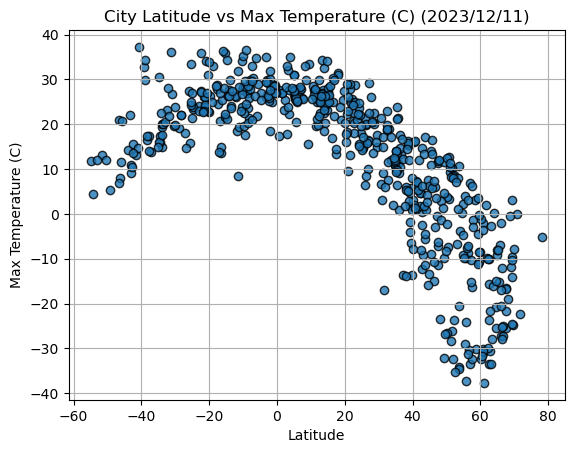

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp (C)"], edgecolors="black", alpha =0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs Max Temperature (C) ({today})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

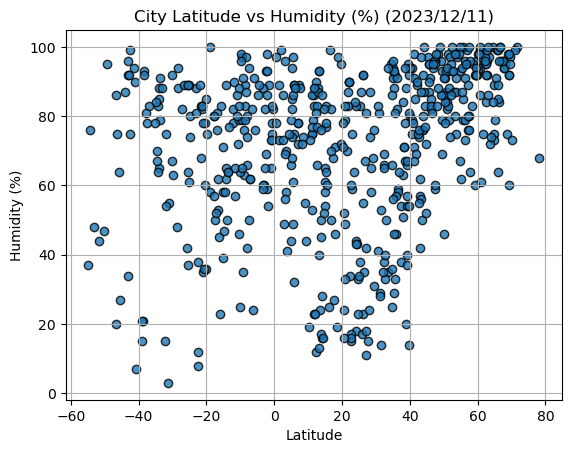

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity (%)"], edgecolors="black", alpha = 0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title (f"City Latitude vs Humidity (%) ({today})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

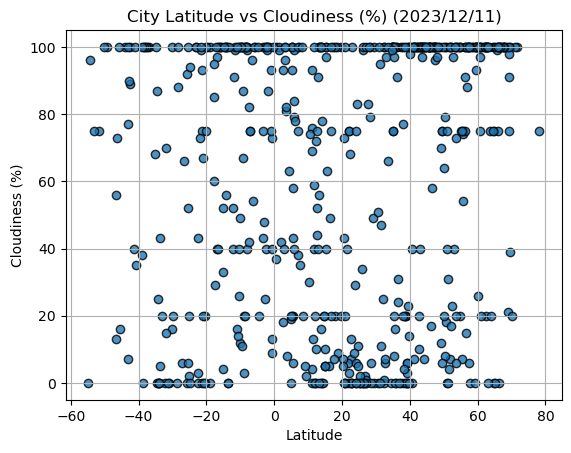

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness (%)"], edgecolors="black", alpha = 0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness (%) ({today})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

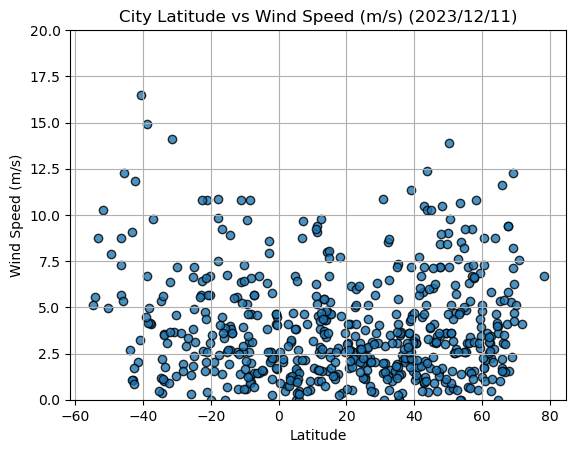

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed (m/s)"], edgecolors="black", alpha = 0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed (m/s) ({today})")
plt.grid(True)
plt.ylim(0, 20)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [82]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=13, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [72]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
4,tiksi,71.6872,128.8694,-22.44,100,100,4.08,RU,1702321377
5,sinabang,2.4803,96.3801,25.42,86,93,0.73,ID,1702321379
9,albany,42.6001,-73.9662,4.70,74,10,5.81,US,1702321363
11,diu,20.7141,70.9822,22.20,52,73,1.71,IN,1702321381
12,stanley,54.8680,-1.6985,2.10,93,20,2.57,GB,1702321112


In [73]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,sesheke,-17.4759,24.2968,24.63,50,29,2.42,ZM,1702321373
1,edinburgh of the seven seas,-37.0676,-12.3116,13.82,83,100,9.76,SH,1702321375
2,malanje,-9.5402,16.3410,17.54,97,100,0.56,AO,1702321377
3,adamstown,-25.0660,-130.1015,21.45,61,2,2.39,PN,1702321377
6,waitangi,-43.9535,-176.5597,14.34,87,100,2.68,NZ,1702321379


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8404224484270887


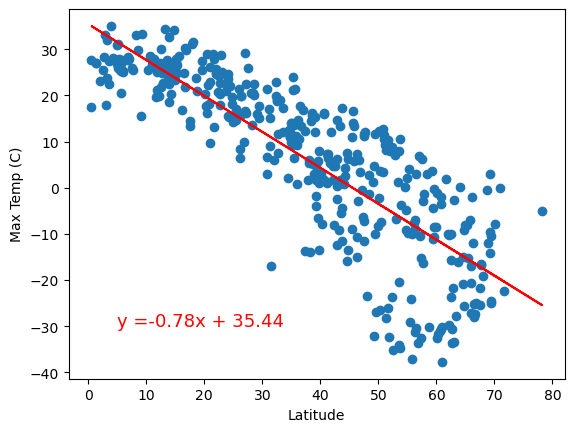

In [83]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp (C)"], (5,-30))

The r-value is: 0.5845269433801835


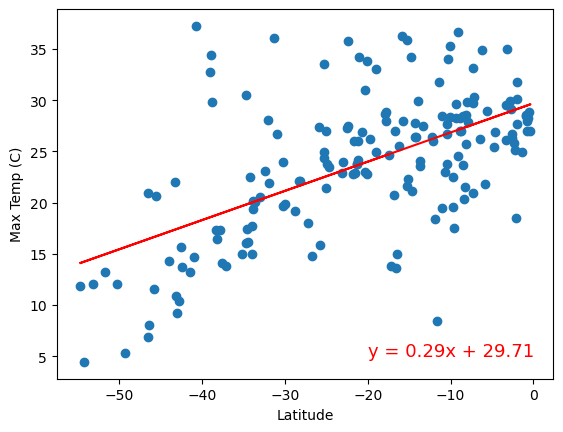

In [84]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp (C)"], (-20,5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4085876948627387


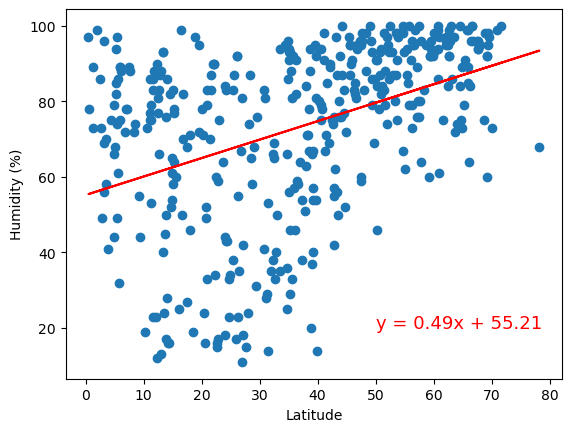

In [85]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity (%)"], (50,20))

The r-value is: 0.14112246901694636


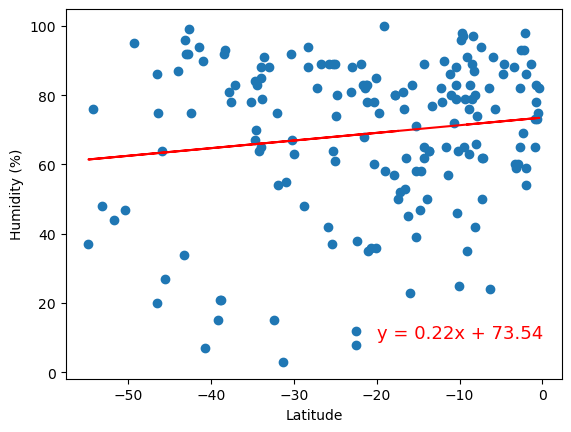

In [86]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity (%)"], (-20,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.27963611867274935


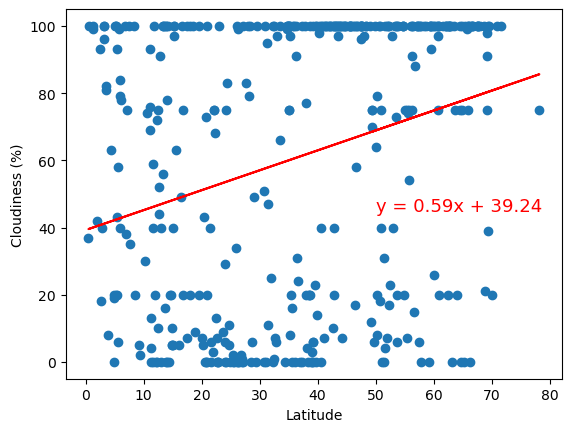

In [88]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness (%)"], (50,45))

The r-value is: 0.13403598924726204


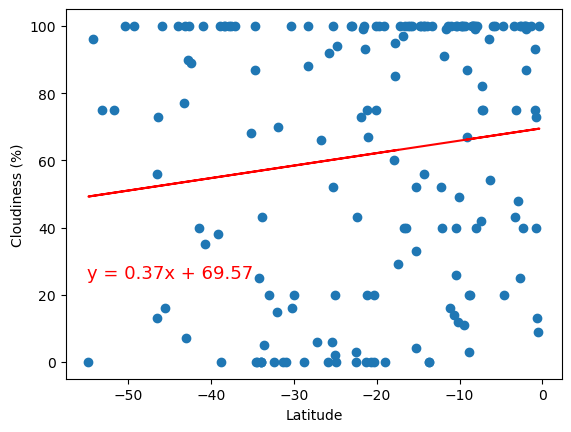

In [89]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness (%)"], (-55,25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.18974269535245558


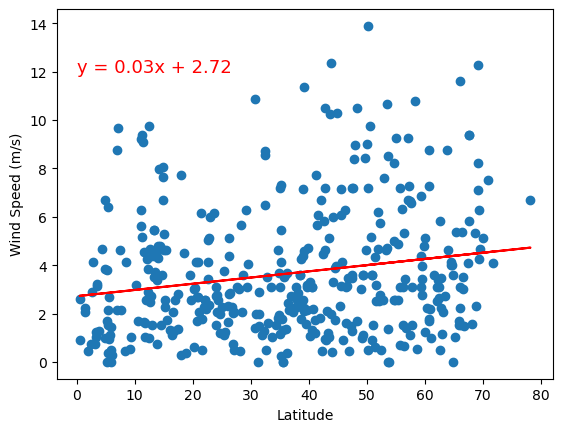

In [90]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed (m/s)"], (0,12))

The r-value is: -0.2363330452554638


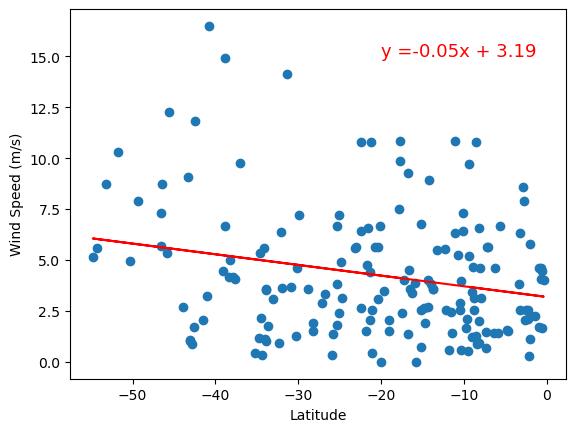

In [91]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed (m/s)"], (-20,15))

**Discussion about the linear relationship:** YOUR RESPONSE HERE